CART分类树准确率 0.9600


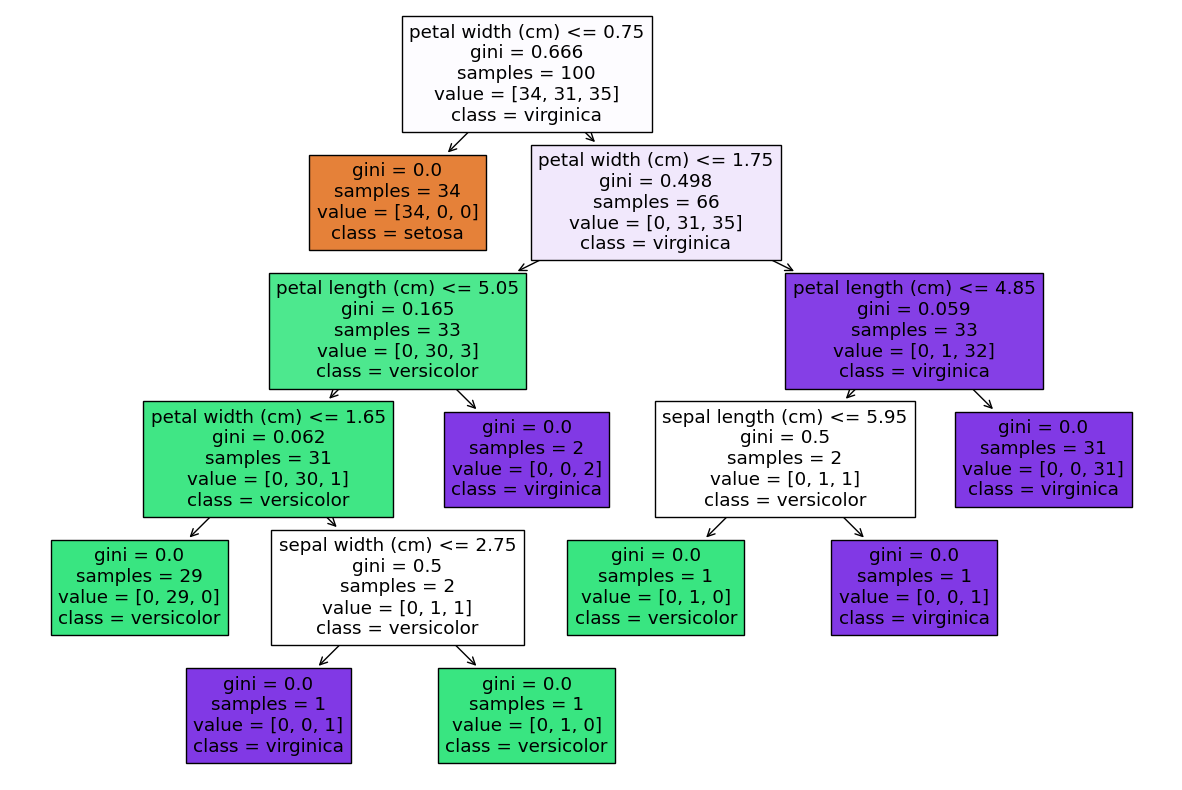

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

# 准备数据集
iris = load_iris()
# 获取特征集和分类标识
features = iris.data
labels = iris.target
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)

# 创建CART分类树
clf = DecisionTreeClassifier(criterion='gini')

# 拟合构造CART分类树
clf = clf.fit(train_features, train_labels)

# 用CART分类树做预测
test_predict = clf.predict(test_features)

# 预测结果与测试集结果作比对
score = accuracy_score(test_labels, test_predict)
print("CART分类树准确率 %.4lf" % score)

# 画出决策树
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names.tolist(), 
                   filled=True)
plt.show()


In [2]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.0 MB/s eta 0:00:0000:010:010m
  Using cached numpy-1.25.0-cp39-cp39-macosx_10_9_x86_64.whl (20.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 690.1 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 准备数据集
california = fetch_california_housing()
# 探索数据
print(california.feature_names)
# 获取特征集和房价
features = california.data
prices = california.target
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)
# 创建CART回归树
dtr = DecisionTreeRegressor()
# 拟合构造CART回归树
dtr.fit(train_features, train_price)
# 预测测试集中的房价
predict_price = dtr.predict(test_features)
# 测试结果的评价
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price))



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
回归树二乘偏差均值: 0.5091779679579418
回归树绝对值偏差均值: 0.4629597695243688


In [11]:
clf = DecisionTreeClassifier(criterion='entropy') # ID3 
# clf = DecisionTreeClassifier(criterion='gini') # CART算法
print(clf)

DecisionTreeClassifier(criterion='entropy')


In [ ]:
DecisionTreeClassifier(class_weight=None, 
                    criterion='entropy',   # 选择特征的标准
                    max_depth=None,        # 决策树最大深度，如果有，防止过拟合
                    max_features=None,     # 在划分数据集时，考虑的最多的特征值数量； 
                                           # int,每次split时最大的特征数；float,百分比 max_features * n_features
                    max_leaf_nodes=None,   # 最大叶子节点数量
                    min_impurity_decrease=0.0,  # 节点划分最小不纯度
                    min_impurity_split=None, # 信息增益必须大于该阈值，否则不分裂
                    min_samples_leaf=1,    # 叶子节点需要的最少样本数。如果某叶子节点数目小于这个阈值，则会和兄弟节点一起被剪枝
                    min_samples_split=2,   # 当节点小于min_samples_split时，不再继续分裂
                    min_weight_fraction_leaf=0.0, # 这个参数表示叶节点的样本权重总和的最小加权分数，范围在0到0.5之间。
                                                # 如果设置的值较大，可能会导致树更保守，防止过拟合，但如果设置的值过大，
                                                # 可能会导致欠拟合。默认值是0，即不考虑权重问题
                    presort=False,         # 在拟合前，是否对数据进行排序，可以使得树构建速度更快，但是在处理大数据集时，会减慢总体速度
                    random_state=None,     # 这个参数是随机数生成器的种子。当你希望每次运行相同的代码时，都得到相同的结果，
                                           # 可以设置这个参数。决策树在训练过程中可能会有随机性（例如，在特征选择上的随机性），
                                           # 因此，如果不设置 random_state 或者每次都设置不同的值，你可能会得到不同的结果。
                                           # 如果设置了固定的 random_state，那么你每次得到的结果将会是相同的。
                    splitter='best')       # 选择属性特征的原则，best是代表所有的特征中选择最好的，random代表在部分特征中选择最好的

In [16]:
# fit(features,labels) # 通过特征矩阵，分类标识，让分类器进行拟合
# predict(features) # 通过特征矩阵，得到分类标识的预测结果
# score(features,labels) # 评估分类器的准确率

In [17]:
import numpy as np
import pandas as pd

# 读取数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# 数据探索
print(train_data.info()) # 使用 info() 了解数据表的基本情况：行数、列数、每列的数据类型、数据完整度
print('-'*30)
print(train_data.describe()) # 了解数据表的统计情况：总数、平均值、标准差、最小值、最大值等；
print('-'*30)
print(train_data.describe(include=['O'])) # 查看字符串类型（非数字）的整体情况
print('-'*30)
print(train_data.head()) # 查看前几行数据（默认是前 5 行)
print('-'*30)
print(train_data.tail()) # 查看后几行数据（默认是最后 5 行）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008  

In [19]:
# 数据清洗
# 使用平均年龄来填充年龄中的 nan 值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
# 使用票价的均值填充票价中的 nan 值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)


In [20]:
print(train_data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [21]:
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)


In [22]:
# 特征选择
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]


In [25]:
from sklearn.feature_extraction import DictVectorizer # 将字典或者类似于字典的数据结构（例如 pandas 的 DataFrame）转换为向量形式
dvec=DictVectorizer(sparse=False) # 参数 sparse=False 意味着结果不会被返回成稀疏矩阵的形式。
                                  # 稀疏矩阵是一种当矩阵中有大量 0 值时可以节省内存的数据结构
train_features=dvec.fit_transform(train_features.to_dict(orient='records')) 
# to_dict(orient='records') 将 pandas DataFrame 转换为字典列表，其中每个字典对应一行数据
# fit_transform() 一步达成两个目标：拟合数据，转化数据
# 它首先 "fit" 模型，即学习输入数据中的所有类别（对于分类特征），然后 "transform" 数据，即将分类特征转换为一个二元编码的形式
# （也就是说，每个类别都会变成一个新的特征，如果一个样本属于这个类别，新的特征值为 1，否则为 0）。

In [26]:
print(dvec.feature_names_)

['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


In [31]:
# 决策树模型
from sklearn.tree import DecisionTreeClassifier # 导入决策树分类器
# 构造 ID3 决策树
clf = DecisionTreeClassifier(criterion='entropy') # 使用信息熵作为划分标准，对决策树进行训练
# 决策树训练
clf.fit(train_features, train_labels)


DecisionTreeClassifier(criterion='entropy')

In [39]:
test_features=dvec.transform(test_features.to_dict(orient='records'))
# 决策树预测
pred_labels = clf.predict(test_features)

In [40]:
print(train_features.shape)
print(test_features.shape)

(891, 10)
(418, 10)


In [42]:
# 得到决策树准确率
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score 准确率为 %.4lf' % acc_decision_tree)


score 准确率为 0.9820


In [43]:
# K折交叉验证
# 1. 将数据集平均分割成 k 个等份    
# 2. 使用 1 份数据作为测试数据，其余作为训练数据
# 3. 计算测试准确率
# 4. 使用不同的测试集，重复 2、3 步骤

import numpy as np
from sklearn.model_selection import cross_val_score # 导入交叉验证函数
# 使用 K 折交叉验证 统计决策树准确率
print(u'cross_val_score 准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))


cross_val_score 准确率为 0.7802


In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))  # 设置图形大小
plot_tree(clf, 
          feature_names=dvec.feature_names_,  
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.show()